# Bibliotecas utilizadas:
### scikit-learn: Machine Learning in Python
### csv: CSV File Reading and Writing
### numpy: package for scientific computing
### matplotlib: Python 2D plotting library

In [1]:
#Import Library of Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import csv
import numpy as np
import matplotlib.pyplot as plt

# Leitura do CSV

### Leitura do CSV e seleção das colunas que serão utilizadas no modelo.
### Variáveis selecionadas: Numéricas. Correlações e distribuições precisam ser exploradas em todas as variáveis.
### Definição da variável alvo: Número de semestres planejados para o curso X Número de semestres realizados pelo aluno (No prazo ou Atrasado)
### Variáveis sócio-econômicas poderiam melhorar o desempenho do Classificador.
### Variáveis relacionadas ao desempenho acadêmico do aluno durante o curso poderiam melhorar a acurácia do Classificador.
### Variáveis: melhorar análise, pois definirá a escolha do Classificador.
### Variáveis que individualizam os alunos não foram selecionadas (Exemplo: COD_ALUNO).

In [2]:
def readCSV(file):
    arrayAlunos = []
    with open(file, 'rt', encoding="ansi") as csvfile:
        csvfile = csv.reader(csvfile, delimiter=';', quotechar='"')        
        next(csvfile)
        for row in csvfile:
            try:
                arrayAlunos.append([
                                int(row[1].strip()),  #COD_UNIDADE                                
                                int(row[8].strip()),  #CEP_ALUNO
                                int(row[9].strip()),  #COD_CURSO
                                int(row[11].strip()), #TURNO_CURSO 
                                int(row[12].strip()), #DURACAO_CURSO 
                                int(row[16].strip()), #CH_TOTAL_MATRIZ
                                int(row[17].strip()), #NR_TOTAL_DISCIPLINAS
                                int(row[18].strip()), #CH_APROVADA
                                int(row[19].strip()), #NR_DISC_APROVADA
                                int(row[20].strip()), #T_IDADE
                                float(row[21].strip().replace(',', '.')), #NOTA                                
                                int(row[24].strip()), #NRO_REPRO_ACO
                                int(row[25].strip()), #NRO_TOTAL_REPRO
                                int(row[26].strip()), #NRO_REPRO_NORMAL
                                int(row[28].strip()), #POSSUI_FIES
                                int(row[35].strip()) #LABEL (Terminou no prazo = 1, Terminou fora do prazo = 0)
                               ])          
            except:
                erro = 'Valor incorreto'
                
    return arrayAlunos

### Função responsável pela criação de 2 Arrays pareados: Features e Labels

In [3]:
def createVector(array):
    label = []
    features = []
    
    for i in array:
        label.append(i[15])
        
    for i in array:
        features.append(i[0:14])
    
    return label, features
    

### Criação do Vetor de características 

In [4]:
array = readCSV("case_Formatura.csv")

label, features = createVector(array)

x = np.array(features)
y = np.array(label)

## Escolha do Classificador
### 5 Classificadores testados: probabilísticos e lineares

In [5]:
model = GaussianNB()
modelMN = MultinomialNB()
modelB = BernoulliNB()
neigh = KNeighborsClassifier(n_neighbors=5)
svm = LinearSVC(random_state=0)

# Divisão da base: Treino e Teste
### A Estratégia utilizada dividiu a base em Treino (77%) e Teste (33%). Outras divisões podem ser utilizadas: Leave-OneOut, Cross-Validation (K-Fold).
### Execução do Classificador: desempenho foi medido por meio da acurácia, mas podemos avaliar outras medidas: Precisão, Revocação, Sensibilidade, Especificidade e F-measure.

# Classificador GaussianNB

In [6]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state = 5)

perform = []
performX = []


model.fit(X_train, y_train)

predicted = model.predict(X_test)

print ("(GaussianNB) Acurácia é: %f" % accuracy_score(y_test, predicted))

perform.append(accuracy_score(y_test, predicted))
performX.append('GaussianNB')


(GaussianNB) Acurácia é: 0.435224


# Classificador MultinomialNB

In [7]:
modelMN.fit(X_train, y_train)

predicted = modelMN.predict(X_test)

print ("(MultinomialNB) Acurácia é: %f" % accuracy_score(y_test, predicted))

perform.append(accuracy_score(y_test, predicted))
performX.append('MultinomialNB')

(MultinomialNB) Acurácia é: 0.502260


# Classificador BernoulliNB

In [8]:
modelB.fit(X_train, y_train)

predicted = modelB.predict(X_test)

print ("(BernoulliNB) Acurácia é: %f" % accuracy_score(y_test, predicted))

perform.append(accuracy_score(y_test, predicted))
performX.append('BernoulliNB')

(BernoulliNB) Acurácia é: 0.624714


# Classificador KNeighborsClassifier

In [9]:
neigh.fit(X_train, y_train)

predicted = neigh.predict(X_test)

print ("(KNeighborsClassifier) Acurácia é: %f" % accuracy_score(y_test, predicted))

perform.append(accuracy_score(y_test, predicted))
performX.append('KNeighborsClassifier')

(KNeighborsClassifier) Acurácia é: 0.616693


# Classificador LinearSVC (SVM)

In [10]:
svm.fit(X_train, y_train)

predicted = svm.predict(X_test)

print ("(LinearSVC) Acurácia é: %f" % accuracy_score(y_test, predicted))

perform.append(accuracy_score(y_test, predicted))
performX.append('LinearSVC')

(LinearSVC) Acurácia é: 0.484760


# Desempenho dos Classificadores
## Embora o Classificador BernoulliNB tenha apresentado o melhor desempenho, análises para verificar a diferença estatística entre os resultados dos Classificadores precisam ser realizadas.

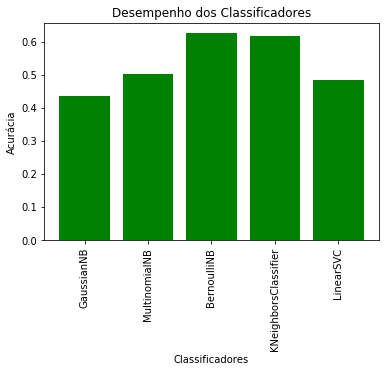

In [11]:
x = performX
y = perform

x_pos = [i for i, _ in enumerate(x)]

plt.bar(x_pos, y, color='green')
plt.xlabel("Classificadores")
plt.ylabel("Acurácia")
plt.title("Desempenho dos Classificadores")

plt.xticks(x_pos, x, rotation=90)

plt.show()